In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# How Education Drives Economic Growth

# This dataset explores the relationship between education and economic performance across countries and continents. It combines key indicators such as literacy rates, physician density, GDP metrics, and unemployment to uncover patterns and insights into how human capital contributes to national prosperity.

In [10]:
dataset = pd.read_csv('education_economy_data.csv')
print(dataset.shape)
dataset.head()

(191, 9)


,Country,Literacy Rate,Physician Density,GDP (Current USD),GDP Growth (% Annual),GDP per Capita (Current USD),GDP per Capita Category,Unemployment Rate (%),Continent
0,Afghanistan,43.0,0.28,1.723305e+10,2.710887,415.707417,Very Low,13.991,Asia
1,Albania,98.1,1.20,2.354718e+10,3.936625,8575.171134,Mid,10.108,Europe
2,Algeria,81.4,1.72,2.476260e+11,4.100000,5364.027950,Low,11.701,Africa
3,Andorra,100.0,3.33,3.785067e+09,2.583555,46812.448450,High,3.700,Europe
4,Angola,71.1,0.21,8.482465e+10,1.001289,2308.159767,Low,14.537,Africa


In [14]:
fisico_per_capita = dataset[(dataset['GDP per Capita (Current USD)'] >= 15_000)]
print(fisico_per_capita.shape)

(62, 9)


In [17]:
numeros_fisicos = fisico_per_capita['Physician Density']

media = np.mean(numeros_fisicos)
mediana = np.median(numeros_fisicos)
quartis = np.quantile(numeros_fisicos, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(numeros_fisicos)
variancia = np.var(numeros_fisicos)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 3.27
Mediana: 3.08
Quartis: [0.8    2.5225 3.08   4.0025 6.56  ]
Desvio-Padrão: 1.24
Variância: 1.54


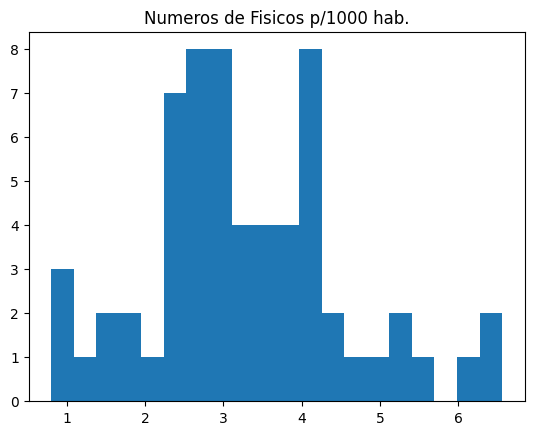

In [21]:
# Testando a Normalidade - Histograma

plt.hist(numeros_fisicos, bins=20)
plt.title("Numeros de Fisicos p/1000 hab.")
plt.show()

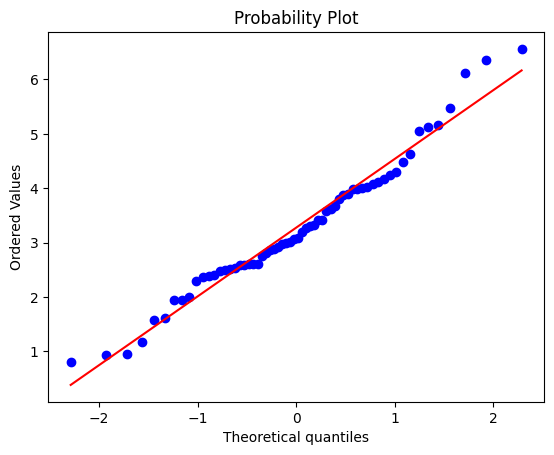

In [22]:
# Teste de Normailidade - Gráfico Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(numeros_fisicos, fit=True,   plot=ax)
plt.show()

In [23]:
# Teste de Normailidade - Shapiro-Wilk
# p > 0.05 para Hipótese Nula

stats.shapiro(numeros_fisicos)


ShapiroResult(statistic=np.float64(0.9727238103484134), pvalue=np.float64(0.18212087305531088))

In [ ]:
# Pelos teste de hipótese, verifica-se que os dados estão distribuídos normalmente, em torno da média, que é 3.27 Físicos por 1000 habitantes, com um filtro de países com PIB per capita >= 15.000 dólares.

In [24]:
# Qual a probabilidade de um país com numeros de físicos por 1000 habitantes >= 2.0 ter um PIB per capita >= 15.000 dólares?

prob = stats.norm.sf(2.0, media, desvio_padrao)
print(f"A Probabilidade é de {prob * 100:.2f}%")


A Probabilidade é de 84.74%


In [25]:
# Qual a probabilidade de um país com numeros de físicos por 1000 habitantes de <= 1.0 ter um PIB per capita >= 15.000 dólares?

prob = stats.norm.cdf(1.0, media, desvio_padrao)
print(f"A Probabilidade é de {prob * 100:.2f}%")

A Probabilidade é de 3.36%


In [34]:
# Criação de um modelo para prevê o PIB per capita de um país com base na quantidade de físicos que o país tem por 1000 habitantes.

X = fisico_per_capita['Physician Density'].values
y = fisico_per_capita['GDP per Capita (Current USD)'].values
X

array([3.33, 2.76, 3.68, 5.17, 1.94, 0.93, 2.48, 3.07, 1.61, 4.03, 2.61,
       2.59, 2.89, 3.  , 1.95, 4.12, 4.01, 4.48, 3.81, 3.27, 4.25, 5.48,
       0.8 , 3.41, 4.08, 3.31, 4.62, 3.98, 2.41, 2.58, 3.19, 3.89, 6.35,
       3.01, 2.86, 6.56, 3.61, 3.59, 2.92, 2.  , 1.18, 1.57, 2.38, 5.12,
       2.49, 2.98, 2.52, 6.11, 2.61, 0.95, 2.29, 3.42, 3.09, 2.36, 3.87,
       3.98, 4.3 , 4.17, 2.53, 2.81, 2.61, 5.05])

In [36]:
correlacao = np.corrcoef(X, y)
print(correlacao)
print(correlacao ** 2)

[[1.         0.34218141]
 [0.34218141 1.        ]]
[[1.         0.11708812]
 [0.11708812 1.        ]]


In [ ]:
# O resultado acima indica uma correlação positiva média entre a variável independente e a variável dependente R = 0.3421. O coeficiente de determinação R² = 0.1170 prevê que apenas 11,70% da variável dependente, ou seja, o PIB per capita, são explicadas pela variável independente, ou seja, os números de físicos de um país por cada 1000 habitantes.

In [37]:
#formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


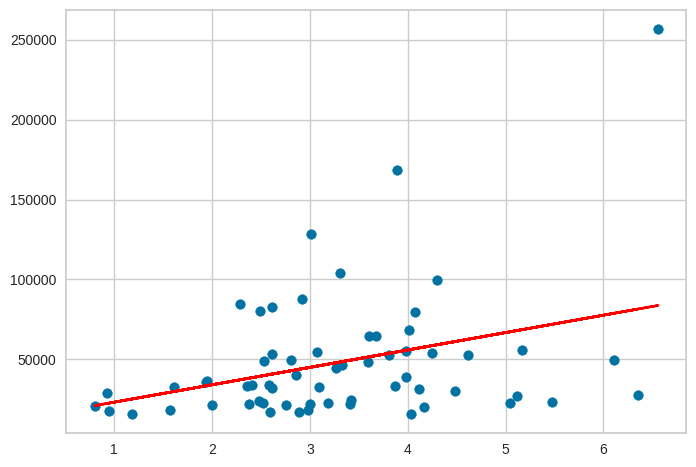

In [38]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')

In [ ]:
# Acima é dada a Reta de Regressão Linear e o gráfico de dispersão dos dados.

In [39]:
# Previsão utilizando função do sklearn
modelo.predict([[2.0]])

array([34166.90214337])

In [ ]:
# Segundo o modelo de previsão obtido, um país que tem 2 físicos por cada 1000 habitantes deverá ter um PIB per capita de 34.166 mil dólares.

# É importante notar que o modelo não deu uma correlação forte. Apenas 11,70% dos dados são explicados pela variável exploratória.

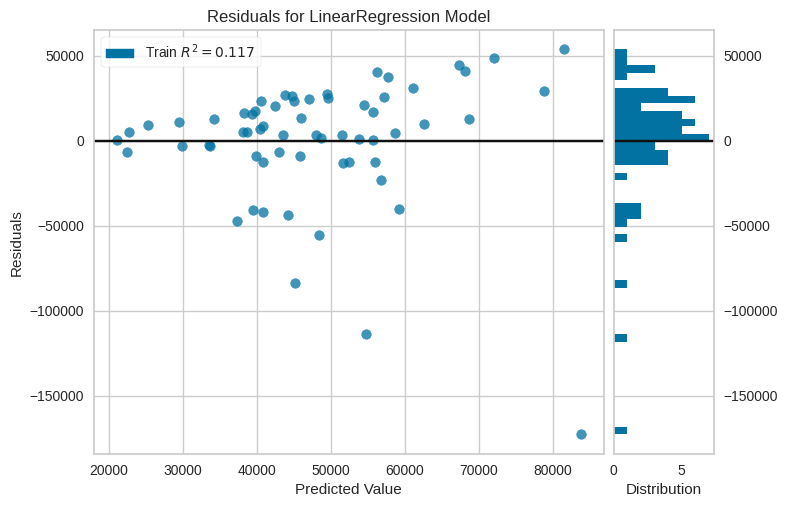

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()